## Imessage Disection 

In this notebook I will investigate the  The Real Housewives of Atlanta data <br />
Activate virtual enviorment: source myenv/bin/activate


run conda activate imessage_dissect, and change it in the top right corner 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import emoji
from functions import read_messages
import datetime

In [2]:
# Read SQL file
sql_file_path = 'grab_and_clean.sql'
with open(sql_file_path, 'r') as sql_file:
    sql_query = sql_file.read()

In [3]:
# TODO: replace with directions to your personal chat.db 
messages = read_messages('/Users/juliawilliams/Library/Messages/chat.db', sql_query)
messages_df = pd.DataFrame(messages)

In [4]:
messages_df = messages_df.drop(['rowid'], axis =1)

In [5]:
# This may accidently delete a few texts but since this is for funzies oh well (insert shrug emoji)
messages_df = messages_df[~messages_df.body.str.contains("an image")]

In [6]:
#df.shape
messages_df.shape

(6065, 7)

In [7]:
messages_df.loc[:, 'message_date'] = pd.to_datetime(messages_df['message_date'])

In [8]:
name_dict = {0:"Me", 1:"Jean", 2:"Rain", 3:"Amelia", 4:"Stormi", 5:"Lan", 6:"Adeline", 231:"Jean", 356:"Jean"}
messages_df = messages_df.copy()
messages_df.loc[:, "Name"] = messages_df["handle_id"].map(name_dict)

[Text(0.5, 1.0, 'All texts and reactions for 2023')]

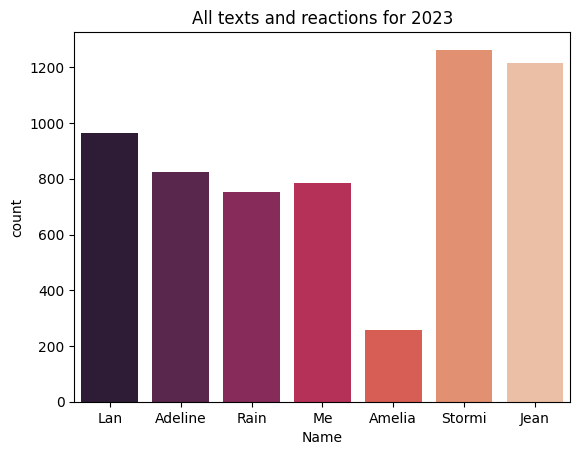

In [9]:
colors = sns.color_palette("rocket", n_colors=len(range(7)))

# Plot the countplot with different colors for each Name 
ax = sns.countplot(x=messages_df["Name"], hue=messages_df["Name"], palette=colors, legend=False)
ax.set(title="All texts and reactions for 2023")

In [10]:
df = messages_df

In [11]:
df.head()

,body,handle_id,is_from_me,message_datetime,message_date,display_name,group_chat_name,Name
0,https://youtu.be/kb6AYwMFbrg?si=NBQlmmI2ZNh2tW85,5,0,2023-12-31 21:51:41,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Lan
1,"Rhyming the word eunuch, climbing into a butth...",6,0,2023-12-31 21:50:40,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline
2,This is one of the best yet,6,0,2023-12-31 21:49:32,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline
3,Watched that w sound in front of my mom,6,0,2023-12-31 21:46:53,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline
4,Wow,6,0,2023-12-31 21:46:46,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline


### Data Engineering 

In [12]:
# Links 
df['link'] = list(map(lambda x: str(x).startswith('https://www.'), df['body'])) 

# Reactions
df['Emphasized'] = list(map(lambda x: str(x).startswith('Emphasized “'), df['body'])) 
df['Laughed'] = list(map(lambda x: str(x).startswith('Laughed at “'), df['body'])) 
df['Liked'] = list(map(lambda x: str(x).startswith('Liked “'), df['body'])) 
df['Loved'] = list(map(lambda x: str(x).startswith('Loved “'), df['body'])) 

# Define a function to count emojis in a given body
def count_emojis(body):
    return emoji.emoji_count(body)

# Create a new column 'emoji_count' by applying the count_emojis function to each row in the 'body' column
df['emoji_count_first_49'] = df['body'].apply(lambda x: count_emojis(x[:49]))

# Create a new column 'emoji_count' by applying the count_emojis function to each row in the 'body' column
df['emoji_count'] = df['body'].apply(lambda x: count_emojis(x))

# Remove preliminary object
df['body'] = df['body'].apply(lambda x: x.strip('￼'))

# Create a new column 'shortened_text' based on your conditions
df['shortened_text'] = df.apply(lambda row: row['body'][:49 - row['emoji_count_first_49']] if row['emoji_count_first_49'] > 0 else row['body'][:49], axis=1)


In [13]:
df = df.sort_values(by='message_datetime')
df

,body,handle_id,is_from_me,message_datetime,message_date,display_name,group_chat_name,Name,link,Emphasized,Laughed,Liked,Loved,emoji_count_first_49,emoji_count,shortened_text
6702,Emphasized “You are hot amanda ”,6,0,2023-01-01 04:27:21,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,True,False,False,False,0,0,Emphasized “You are hot amanda ”
6700,A great night in Atlanta,5,0,2023-01-01 10:07:03,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Lan,False,False,False,False,False,0,0,A great night in Atlanta
6696,awwwwwwweewweeewee,6,0,2023-01-01 10:16:10,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0,0,awwwwwwweewweeewee
6695,I’m so jealous I want to be Jacko in everyone’...,6,0,2023-01-01 10:16:45,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0,0,I’m so jealous I want to be Jacko in everyone’s a
6694,Avi can you send a pic of dans grandma,5,0,2023-01-01 10:17:01,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Lan,False,False,False,False,False,0,0,Avi can you send a pic of dans grandma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Wow,6,0,2023-12-31 21:46:46,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0,0,Wow
3,Watched that w sound in front of my mom,6,0,2023-12-31 21:46:53,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0,0,Watched that w sound in front of my mom
2,This is one of the best yet,6,0,2023-12-31 21:49:32,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0,0,This is one of the best yet
1,"Rhyming the word eunuch, climbing into a butth...",6,0,2023-12-31 21:50:40,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0,0,"Rhyming the word eunuch, climbing into a butthole"


I want to add the handle_id for each reaction so we can see who got the most laughs, loves, etc....
text_message df will be all the messages that a plain messages
reaction_message df will be all the messages that are actually reactions 

Then I'll join on an edited version of the body column to get the handle_id of the original text message 

In [14]:
text_message  = df[(df['Emphasized']==0) & (df['Laughed']==0) & (df['Liked']==0) & (df['Loved']==0)].copy()
text_message["reaction"] = None
text_message["reaction_text"] = None
text_message["reaction_id"] = None
text_message["reaction_name"] = None


joiner = text_message[['shortened_text','handle_id','message_date']].copy()
joiner = joiner.rename(columns={'handle_id': 'reaction_id', 'message_date': 'original_message_date'})


# text_message.head()

In [15]:
joiner

,shortened_text,reaction_id,original_message_date
6700,A great night in Atlanta,5,2023-01-01 00:00:00
6696,awwwwwwweewweeewee,6,2023-01-01 00:00:00
6695,I’m so jealous I want to be Jacko in everyone’s a,6,2023-01-01 00:00:00
6694,Avi can you send a pic of dans grandma,5,2023-01-01 00:00:00
6688,Here is the grandma!\nShe is a painter. I’m ta...,6,2023-01-01 00:00:00
...,...,...,...
4,Wow,6,2023-12-31 00:00:00
3,Watched that w sound in front of my mom,6,2023-12-31 00:00:00
2,This is one of the best yet,6,2023-12-31 00:00:00
1,"Rhyming the word eunuch, climbing into a butthole",6,2023-12-31 00:00:00


In [16]:
text_message.shape

(4238, 20)

In [17]:
reaction_message = df[(df['Emphasized']==1) | (df['Laughed']==1) | (df['Liked']==1) | (df['Loved']==1)].copy()
reaction_message[['reaction', 'reaction_text']] = reaction_message['body'].str.split('“', n=1, expand=True)
reaction_message['reaction_text'] = reaction_message['reaction_text'].str.replace('”', '')
reaction_message.head()


,body,handle_id,is_from_me,message_datetime,message_date,display_name,group_chat_name,Name,link,Emphasized,Laughed,Liked,Loved,emoji_count_first_49,emoji_count,shortened_text,reaction,reaction_text
6702,Emphasized “You are hot amanda ”,6,0,2023-01-01 04:27:21,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,True,False,False,False,0,0,Emphasized “You are hot amanda ”,Emphasized,You are hot amanda
6682,Emphasized “I’m so jealous I want to be Jacko ...,231,0,2023-01-01 10:25:54,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Jean,False,True,False,False,False,0,0,Emphasized “I’m so jealous I want to be Jacko in,Emphasized,I’m so jealous I want to be Jacko in everyone’...
6678,Loved “Here is the grandma!\nShe is a painter....,0,1,2023-01-01 10:28:21,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Me,False,False,False,False,True,0,0,Loved “Here is the grandma!\nShe is a painter....,Loved,Here is the grandma!\nShe is a painter. I’m ta...
6677,Emphasized “she is so flippin cute”,5,0,2023-01-01 10:29:27,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Lan,False,True,False,False,False,0,0,Emphasized “she is so flippin cute”,Emphasized,she is so flippin cute
6676,Loved “Here is the grandma!\nShe is a painter....,5,0,2023-01-01 10:29:33,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Lan,False,False,False,False,True,0,0,Loved “Here is the grandma!\nShe is a painter....,Loved,Here is the grandma!\nShe is a painter. I’m ta...


It appears that the full text message in not always present in the body column of reaction rows. I did some testing and discovered that the test is the first 49 chracters including emojis.   
Shortened Text is going to be what I join on 

In [18]:
# Create a new column 'shortened_text' based on your conditions
reaction_message['shortened_text'] = reaction_message.apply(lambda row: row['reaction_text'][:49 - row['emoji_count_first_49']] if row['emoji_count_first_49'] > 0 else row['reaction_text'][:49], axis=1)


# Create a new column 'emoji_count' by applying the count_emojis function to each row in the 'body' column
reaction_message['emoji_count_first_49'] = reaction_message['shortened_text'].apply(lambda x: count_emojis(x[:49]))

In [19]:
reaction_message.shape

(1827, 18)

Originally I do the below but - I was getting too many matches and at the same time missing over 100 matches, so I refined my code and used fuzzywuzzy 

Note this is not optimal solution if you have a huge df!

### Resorting to FuzzyWuzzy to match (: 

In [20]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/Users/juliawilliams/opt/anaconda3/envs/imessage_dissect/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [21]:
# DO NOT DELETE CLEARNING
text_list = reaction_message['shortened_text'].tolist()

date_list= reaction_message['message_date'].tolist()


answers = []

for i, val in enumerate(text_list): 
# Min and max dates 
    min_date = date_list[i]-datetime.timedelta(days=10)
    max_date = date_list[i]
    # max_date = min_date + datetime.timedelta(days=10)

    temp_df = joiner[(joiner['original_message_date']<= max_date)&(joiner['original_message_date']>= min_date)]
    answers.append(process.extractOne(val, temp_df['shortened_text']))

reaction_ids = []
for phrase, rank, i in answers: 
    if rank>=90: 
        id = joiner['reaction_id'][i]
        reaction_ids.append(id)
    else:
        reaction_ids.append(None)

In [22]:
reaction_message['reaction_id'] = reaction_ids

In [23]:
reaction_message[reaction_message["reaction_id"].isnull()]

,body,handle_id,is_from_me,message_datetime,message_date,display_name,group_chat_name,Name,link,Emphasized,Laughed,Liked,Loved,emoji_count_first_49,emoji_count,shortened_text,reaction,reaction_text,reaction_id
6702,Emphasized “You are hot amanda ”,6,0,2023-01-01 04:27:21,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,True,False,False,False,0,0,You are hot amanda,Emphasized,You are hot amanda,NaN
6645,Emphasized “(alyssa and kara) i just read tha...,4,0,2023-01-04 19:56:30,2023-01-04 00:00:00,The real housewives of GT,The real housewives of GT,Stormi,False,True,False,False,False,0,0,(alyssa and kara) i just read that anxiety can c,Emphasized,(alyssa and kara) i just read that anxiety ca...,NaN
6051,Loved “Look how well these go together ”,231,0,2023-02-09 08:18:55,2023-02-09 00:00:00,The real housewives of GT,The real housewives of GT,Jean,False,False,False,False,True,0,0,Look how well these go together,Loved,Look how well these go together,NaN
3858,Loved “packing list: 1 bathing suit\n1 towel (...,4,0,2023-06-07 07:55:32,2023-06-07 00:00:00,The real housewives of GT,The real housewives of GT,Stormi,False,False,False,False,True,0,0,packing list: 1 bathing suit\n1 towel (beach o...,Loved,packing list: 1 bathing suit\n1 towel (beach o...,NaN
3857,Loved “packing list: 1 bathing suit\n1 towel (...,356,0,2023-06-07 08:08:01,2023-06-07 00:00:00,The real housewives of GT,The real housewives of GT,Jean,False,False,False,False,True,0,0,packing list: 1 bathing suit\n1 towel (beach o...,Loved,packing list: 1 bathing suit\n1 towel (beach o...,NaN


In [24]:
# At this point I checked my message and saw that I sent every single one of these  (I used that wierd header thing no one knows about) Anyways, I manually fixed the rest bc it was easier
# name_dict = {0:"Julia", 1:"Abby", 2:"Amanda", 3:"Alyssa", 4:"Kara", 5:"Lauren", 6:"Avi", 231:"Abby", 356:"Abby"}
# df["Name"] = df["handle_id"].map(name_dict)

# You are hot amanda (technically this message was sent in 2022, but the reaction occured in 2023)
reaction_message.loc[4533, 'reaction_id'] = 4

# Look how well these go together (crazy pre characters)
reaction_message.loc[5494, 'reaction_id'] = 5

# The rest (I used that wierd header thing no one knows about)
julia = [2096,2675,6346]
for x in julia:
    reaction_message.loc[x, 'reaction_id'] = 0

In [25]:
name_dict = {0:"Me", 1:"Jean", 2:"Rain", 3:"Amelia", 4:"Stormi", 5:"Lan", 6:"Adeline", 231:"Jean", 356:"Jean"}
reaction_message["reaction_name"] = reaction_message["reaction_id"].map(name_dict)

In [26]:
reaction_message[reaction_message["reaction_id"].isnull()]

,body,handle_id,is_from_me,message_datetime,message_date,display_name,group_chat_name,Name,link,Emphasized,Laughed,Liked,Loved,emoji_count_first_49,emoji_count,shortened_text,reaction,reaction_text,reaction_id,reaction_name
6702,Emphasized “You are hot amanda ”,6.0,0.0,2023-01-01 04:27:21,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,True,False,False,False,0.0,0.0,You are hot amanda,Emphasized,You are hot amanda,NaN,NaN
6645,Emphasized “(alyssa and kara) i just read tha...,4.0,0.0,2023-01-04 19:56:30,2023-01-04 00:00:00,The real housewives of GT,The real housewives of GT,Stormi,False,True,False,False,False,0.0,0.0,(alyssa and kara) i just read that anxiety can c,Emphasized,(alyssa and kara) i just read that anxiety ca...,NaN,NaN
6051,Loved “Look how well these go together ”,231.0,0.0,2023-02-09 08:18:55,2023-02-09 00:00:00,The real housewives of GT,The real housewives of GT,Jean,False,False,False,False,True,0.0,0.0,Look how well these go together,Loved,Look how well these go together,NaN,NaN
3858,Loved “packing list: 1 bathing suit\n1 towel (...,4.0,0.0,2023-06-07 07:55:32,2023-06-07 00:00:00,The real housewives of GT,The real housewives of GT,Stormi,False,False,False,False,True,0.0,0.0,packing list: 1 bathing suit\n1 towel (beach o...,Loved,packing list: 1 bathing suit\n1 towel (beach o...,NaN,NaN
3857,Loved “packing list: 1 bathing suit\n1 towel (...,356.0,0.0,2023-06-07 08:08:01,2023-06-07 00:00:00,The real housewives of GT,The real housewives of GT,Jean,False,False,False,False,True,0.0,0.0,packing list: 1 bathing suit\n1 towel (beach o...,Loved,packing list: 1 bathing suit\n1 towel (beach o...,NaN,NaN


Join the Data frames back together

In [27]:
df = pd.concat([text_message, reaction_message]).sort_values(by='message_datetime')

/var/folders/4p/nxlcj905765d6nslwh74ndyw0000gn/T/ipykernel_21631/1216006765.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([text_message, reaction_message]).sort_values(by='message_datetime')


In [28]:
df.reset_index(drop=True)

,body,handle_id,is_from_me,message_datetime,message_date,display_name,group_chat_name,Name,link,Emphasized,Laughed,Liked,Loved,emoji_count_first_49,emoji_count,shortened_text,reaction,reaction_text,reaction_id,reaction_name
0,Emphasized “You are hot amanda ”,6.0,0.0,2023-01-01 04:27:21,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,True,False,False,False,0.0,0.0,You are hot amanda,Emphasized,You are hot amanda,NaN,NaN
1,A great night in Atlanta,5.0,0.0,2023-01-01 10:07:03,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Lan,False,False,False,False,False,0.0,0.0,A great night in Atlanta,None,None,NaN,NaN
2,awwwwwwweewweeewee,6.0,0.0,2023-01-01 10:16:10,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0.0,0.0,awwwwwwweewweeewee,None,None,NaN,NaN
3,I’m so jealous I want to be Jacko in everyone’...,6.0,0.0,2023-01-01 10:16:45,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0.0,0.0,I’m so jealous I want to be Jacko in everyone’s a,None,None,NaN,NaN
4,Avi can you send a pic of dans grandma,5.0,0.0,2023-01-01 10:17:01,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Lan,False,False,False,False,False,0.0,0.0,Avi can you send a pic of dans grandma,None,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6064,https://youtu.be/kb6AYwMFbrg?si=NBQlmmI2ZNh2tW85,5.0,0.0,2023-12-31 21:51:41,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Lan,False,False,False,False,False,0.0,0.0,https://youtu.be/kb6AYwMFbrg?si=NBQlmmI2ZNh2tW85,None,None,NaN,None
6065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,Stormi
6066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Lan
6067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Me


... and voila!

In [29]:
# Save to a csv for later
df.to_csv('engineerd_public_df.csv', index=False)

### Now for some graphs

[Text(0.5, 1.0, 'Pure Messages')]

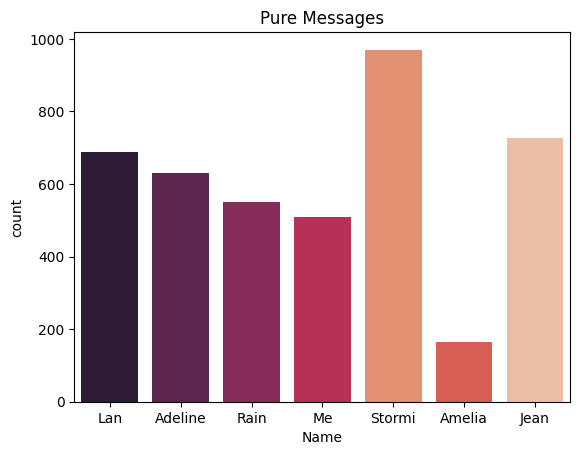

In [30]:
colors = sns.color_palette("rocket", n_colors=len(range(7)))
sns.countplot(x=text_message["Name"], hue=messages_df["Name"], palette=colors, legend=False).set(title = "Pure Messages")

[Text(0.5, 1.0, 'Links')]

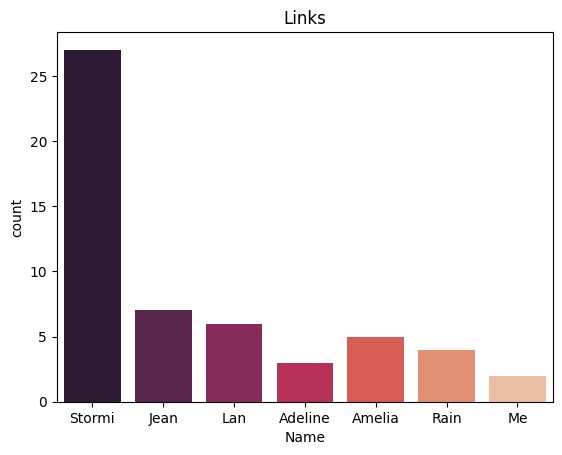

In [31]:
df_links = df[(df.link == True)]
colors = sns.color_palette("rocket", n_colors=len(range(7)))
sns.countplot(x=df_links["Name"], hue=df_links["Name"], palette=colors, legend=False).set(title = "Links")

[Text(0.5, 1.0, 'Reactions Messages')]

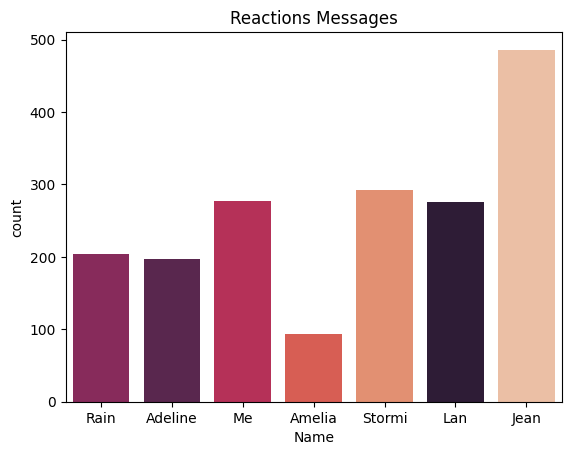

In [32]:
colors = sns.color_palette("rocket", n_colors=len(range(7)))
sns.countplot(x=reaction_message["Name"], hue=messages_df["Name"], palette=colors, legend=False).set(title = "Reactions Messages")

Who recieved the most reactions? 

[Text(0.5, 1.0, 'Reactions Recieved')]

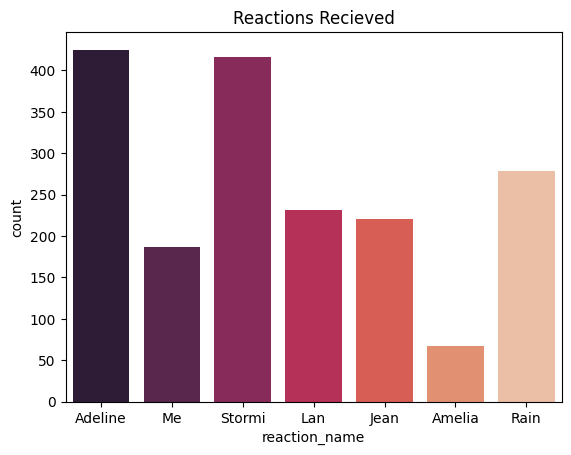

In [33]:
colors = sns.color_palette("rocket", n_colors=len(range(7)))
sns.countplot(x=reaction_message["reaction_name"], hue=reaction_message["reaction_name"], palette=colors, legend=False).set(title = "Reactions Recieved")

/var/folders/4p/nxlcj905765d6nslwh74ndyw0000gn/T/ipykernel_21631/3895735455.py:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.countplot(x="reaction_name", hue="reaction", data=reaction_message, palette=colors).set(title = "Reactions Recieved Breakdown")


[Text(0.5, 1.0, 'Reactions Recieved Breakdown')]

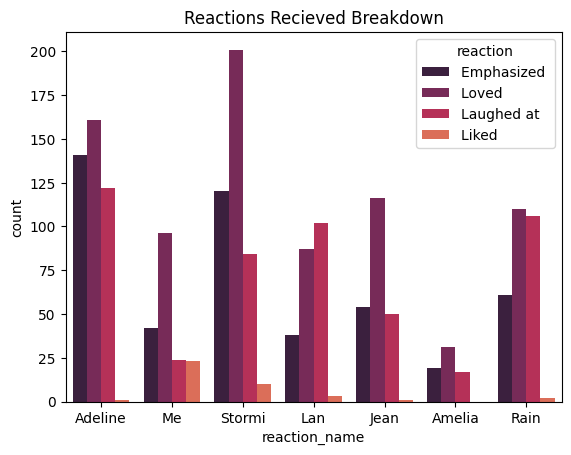

In [34]:
# Assuming 'reaction_type' is the column indicating the type of reaction
colors = sns.color_palette("rocket", n_colors=len(reaction_message["reaction"].unique()))

# Use hue to break down counts by 'reaction_type'
sns.countplot(x="reaction_name", hue="reaction", data=reaction_message, palette=colors).set(title = "Reactions Recieved Breakdown")


normalized reactions

In [35]:
# Code from https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot thx you<3
x,y = 'reaction_name', 'reaction'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

df1.head()


,reaction_name,reaction,percent
0,Adeline,Loved,37.882353
1,Adeline,Emphasized,33.176471
2,Adeline,Laughed at,28.705882
3,Adeline,Liked,0.235294
4,Amelia,Loved,46.268657


/var/folders/4p/nxlcj905765d6nslwh74ndyw0000gn/T/ipykernel_21631/3285896414.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, palette= colors, aspect=2)


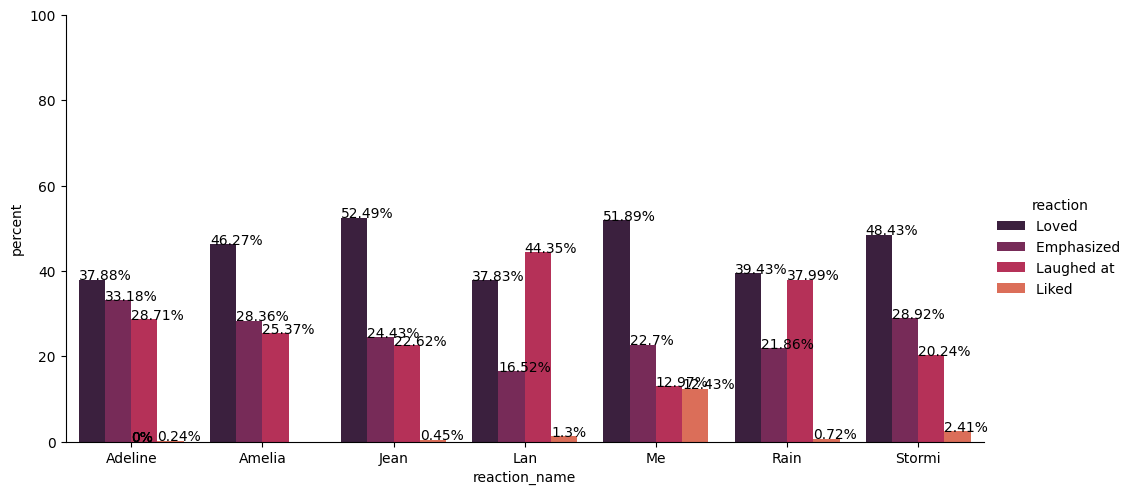

In [36]:
# plt.figure(figsize=(, 40)) 
colors = sns.color_palette("rocket", n_colors=len(reaction_message["reaction"].unique()))
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, palette= colors, aspect=2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(round(p.get_height(),2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


Biggest fangirl 

/var/folders/4p/nxlcj905765d6nslwh74ndyw0000gn/T/ipykernel_21631/3315737238.py:5: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.countplot(x="reaction_name", hue="Name", data=reaction_message, palette=colors).set(title = "Biggest Fan !")


[Text(0.5, 1.0, 'Biggest Fan !')]

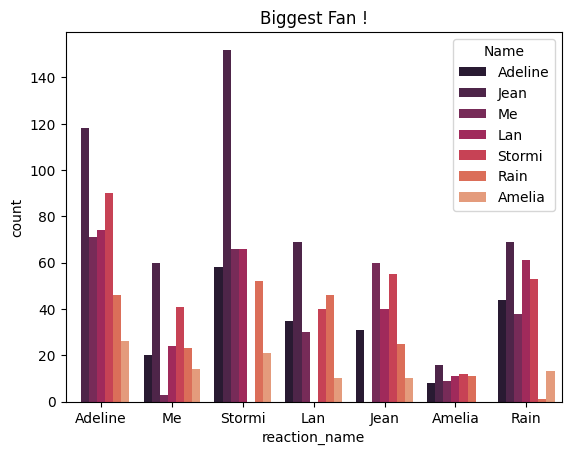

In [37]:
# Assuming 'reaction_type' is the column indicating the type of reaction
colors = sns.color_palette("rocket", n_colors=len(reaction_message["Name"].unique()))

# Use hue to break down counts by 'reaction_type'
sns.countplot(x="reaction_name", hue="Name", data=reaction_message, palette=colors).set(title = "Biggest Fan !")

Now lets normalize the reactions and calculate biggest fan again 

In [38]:
# Code from https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot thx you<3
x,y = 'reaction_name', 'Name'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

df1.head()


,reaction_name,Name,percent
0,Adeline,Jean,27.764706
1,Adeline,Stormi,21.176471
2,Adeline,Lan,17.411765
3,Adeline,Me,16.705882
4,Adeline,Rain,10.823529


In [39]:
df1.shape

(44, 3)

/var/folders/4p/nxlcj905765d6nslwh74ndyw0000gn/T/ipykernel_21631/1502820268.py:3: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, palette= colors, aspect=2)


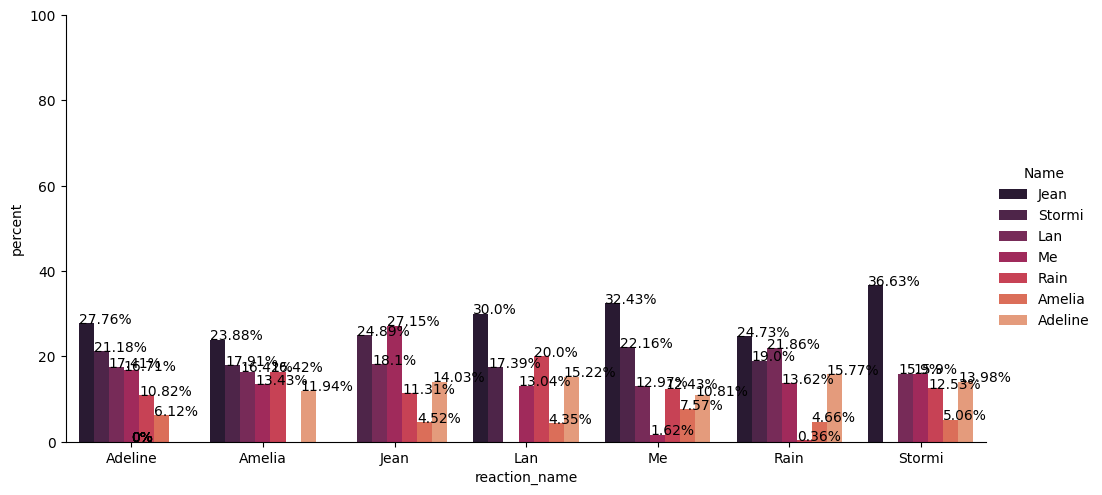

In [40]:
# plt.figure(figsize=(, 40)) 
colors = sns.color_palette("rocket", n_colors=len(reaction_message["reaction_name"].unique()))
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, palette= colors, aspect=2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(round(p.get_height(),2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
